# Boston House Pricing dataset from sklearn

## Loading data into pandas dataframe

First we extract a list of descriptions out of the data set to understand what we are actually looking at

* CRIM     per capita crime rate by town
* ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS    proportion of non-retail business acres per town
* CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* NOX      nitric oxides concentration (parts per 10 million)
* RM       average number of rooms per dwelling
* AGE      proportion of owner-occupied units built prior to 1940
* DIS      weighted distances to five Boston employment centres
* RAD      index of accessibility to radial highways
* TAX      full-value property-tax rate per \$10,000
* PTRATIO  pupil-teacher ratio by town
* B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT    % lower status of the population
* MEDV     Median value of owner-occupied homes in $1000's

In [1]:
import pandas as pd
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

boston_dataset = load_boston()
df = pd.DataFrame(boston_dataset["data"])
df.columns = boston_dataset["feature_names"]

df["MEDV"] = boston_dataset["target"]


In [152]:
df.isna().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
MEDV       False
dtype: bool

So there are no missing values which is good, otherwise we would now take a look at what features have missing values and if we can fix it with an Imputer or if we have to simply drop lines where features have missing values or maybe even drop the feature itself if too many observations have missing values in that particular feature.

Next up we have a look at the distribution of all the variables, since they all are numerical we are not missing out on anything here.

In [155]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


So we notice here two features that are eactually behaving a bit off, namely "ZN" and "CHAS". Both of them have min/25 percentile/50 percentile 0 which indicates a high skew. 

To investigate that further lets plot the histogram/distribution charts of all the features to confirm that observation.
Notice here that this is expected because CHAS is a dummy variable that is either 0 or 1 so its actually a categorical one, and ZN is the proportion so its also kind of categorical capped at 100 being a ratio. It could as well be scaled down to \[0,1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f48c98d4f98>,
      dtype=object)

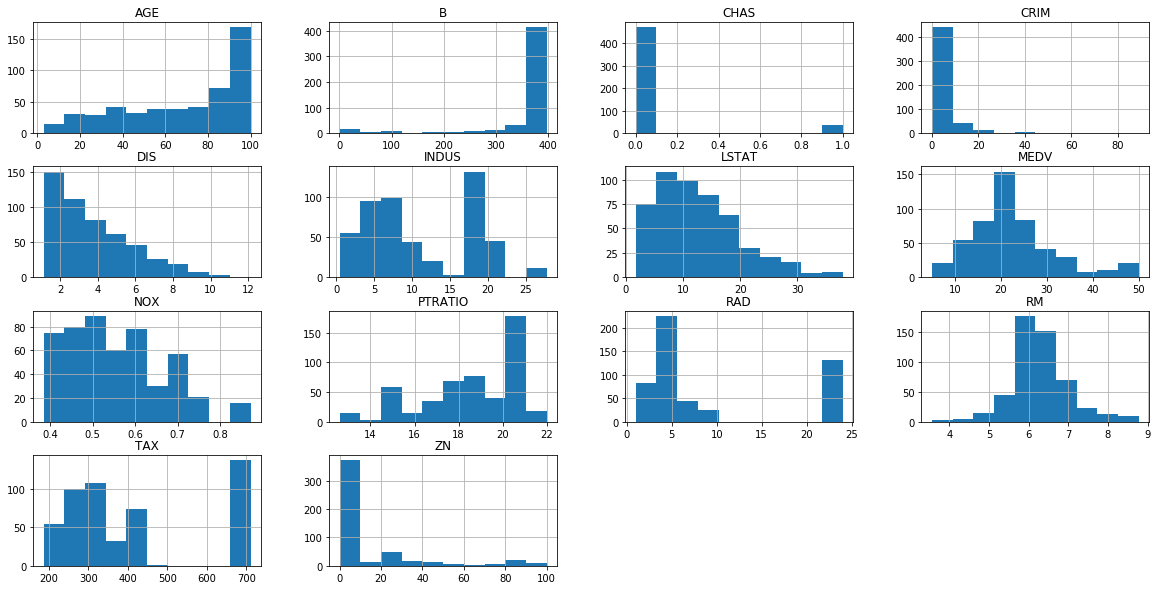

In [6]:
df.hist(figsize=(20,10))

That looks already interesting. What can be already seen here is that our target MEDV is almost normal distributed, we have to check on thet weird little bump towards 50(k) there.

As predicted ZN and CHAS are not distributed normal at all, and as well B is very skewed towards 400. Whats also noticable is TAX and RAD having these gaps between their max value and the rest of their values.

We continue in investigating now step-by-step first the MEDV (target) and then we go ahead and see what other features are worth investigating after seeing there corelation towards the target variable


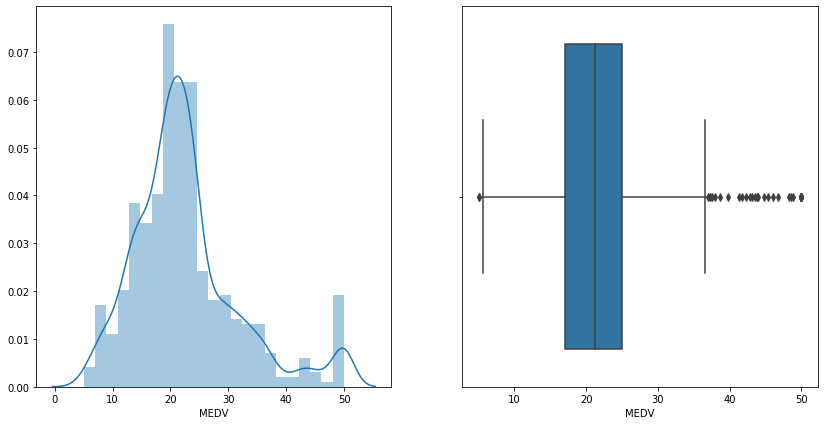

In [14]:
plt.figure(figsize=(14, 7))

ax = plt.subplot(121)
sns.distplot(df["MEDV"], ax=ax)

ax = plt.subplot(122)
sns.boxplot(df["MEDV"],ax=ax)

So here we see a lot of outliers. That is expected because we can see the bell curve hence the normal distribution and there are big outliers towards the 50. 

So we now investigate the Outliers to see if they are reasonable and are reflecting our problem here. Because it might be that the MEDV is capped at 50 and thus it would explain the jamming at value 50.

Let's see if the outliers make sense

In [22]:
irq = df["MEDV"].quantile(.75) - df["MEDV"].quantile(.25)
upperWhiskerBound = df["MEDV"].quantile(.75) + 1.5 * irq

df_outliers = df[df["MEDV"] > upperWhiskerBound]

print(df_outliers.shape)

df_outliers




(38, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
97,0.12083,0.0,2.89,0.0,0.4450,8.069,76.0,3.4952,2.0,276.0,18.0,396.90,4.21,38.7
98,0.08187,0.0,2.89,0.0,0.4450,7.820,36.9,3.4952,2.0,276.0,18.0,393.53,3.57,43.8
157,1.22358,0.0,19.58,0.0,0.6050,6.943,97.4,1.8773,5.0,403.0,14.7,363.43,4.59,41.3
161,1.46336,0.0,19.58,0.0,0.6050,7.489,90.8,1.9709,5.0,403.0,14.7,374.43,1.73,50.0
162,1.83377,0.0,19.58,1.0,0.6050,7.802,98.2,2.0407,5.0,403.0,14.7,389.61,1.92,50.0
163,1.51902,0.0,19.58,1.0,0.6050,8.375,93.9,2.1620,5.0,403.0,14.7,388.45,3.32,50.0
166,2.01019,0.0,19.58,0.0,0.6050,7.929,96.2,2.0459,5.0,403.0,14.7,369.30,3.70,50.0
179,0.05780,0.0,2.46,0.0,0.4880,6.980,58.4,2.8290,3.0,193.0,17.8,396.90,5.04,37.2
180,0.06588,0.0,2.46,0.0,0.4880,7.765,83.3,2.7410,3.0,193.0,17.8,395.56,7.56,39.8
182,0.09103,0.0,2.46,0.0,0.4880,7.155,92.2,2.7006,3.0,193.0,17.8,394.12,4.82,37.9


Observations:
* outliers rooms range from little to many
* tax also ranges from low to high

Both if it is unusal so lets again compare distributions of outliers vs distribution of whole dataset

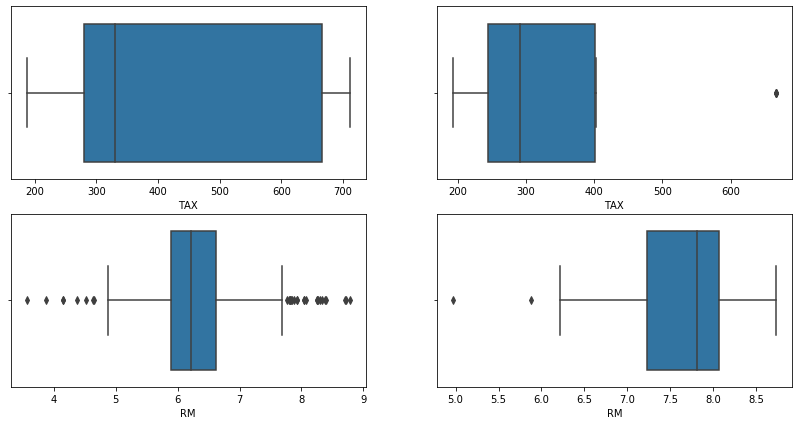

In [26]:
plt.figure(figsize=(14, 7))

ax=plt.subplot(221)
sns.boxplot(df["TAX"],ax=ax)

ax=plt.subplot(222)
sns.boxplot(df_outliers["TAX"],ax=ax)

ax=plt.subplot(223)
sns.boxplot(df["RM"],ax=ax)

ax=plt.subplot(224)
sns.boxplot(df_outliers["RM"],ax=ax)



The Boxplots for outliers are on the right.

We can see that for TAX it looks weirdly cut off and also it ranges almost the same as the whole dataset just missing the higher taxes which seems unusal for buildings that have the highest prices.

Furtheremore the boxplot of the rooms is indeed giving as a higher median which is expected from a higher house price, but still it has houses in with only 5 rooms which seems to be odd when looking at the most expensive mansions.

Conclusion:

We will drop all the observations that have outliers in the target variable because it seems not make sense and might disturb our model.

In [31]:
df = df[df["MEDV"] <= upperWhiskerBound]


Next up is TAX. We remembered that it looks odd, lets have a look again at boxplot and distplot to see whats going on here.

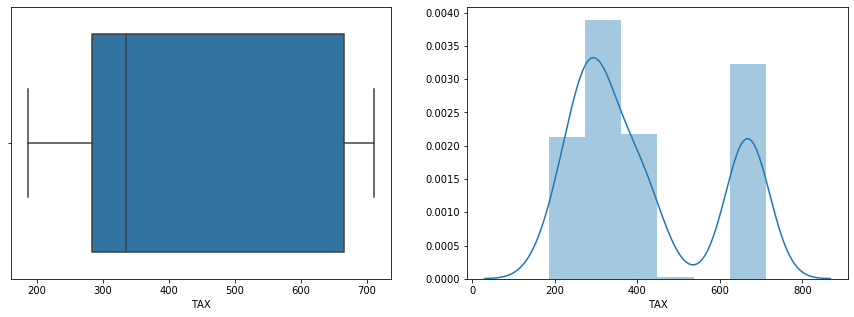

In [33]:
plt.figure(figsize=(15,5))

ax = plt.subplot(121)
sns.boxplot(df["TAX"],ax=ax)

ax = plt.subplot(122)
sns.distplot(df["TAX"],ax=ax)

Although the box plot seem to indicate that there are no outliers, looking at the distplot reveals that there seems to be a normal distribution with a huge set of outliers at around 650. 

Next step is to isolate these outliers lets say all values > 600 and investigate on what is going on.

In [38]:
df_isolate = df[df["TAX"] >= 600]
print(df_isolate.TAX.unique())
df_isolate.describe()

[666. 711.]


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,132.000000,132.0,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,12.502868,0.0,18.465152,0.037879,0.671303,6.000689,89.709848,2.085395,23.242424,667.704545,20.196212,287.995606,19.167045,14.994697
std,13.216389,0.0,1.847316,0.191630,0.061816,0.712621,12.611021,0.597438,3.832607,8.623365,0.019163,145.913197,6.483094,5.405825
min,0.105740,0.0,18.100000,0.000000,0.532000,3.561000,40.300000,1.137000,4.000000,666.000000,20.100000,0.320000,5.290000,5.000000
25%,5.404117,0.0,18.100000,0.000000,0.614000,5.674250,85.325000,1.637600,24.000000,666.000000,20.200000,167.375000,14.647500,10.900000
50%,8.887540,0.0,18.100000,0.000000,0.693000,6.139500,94.200000,1.951200,24.000000,666.000000,20.200000,373.740000,18.100000,14.100000
75%,14.333700,0.0,18.100000,0.000000,0.713000,6.407250,98.800000,2.431300,24.000000,666.000000,20.200000,395.355000,23.275000,19.200000
max,88.976200,0.0,27.740000,1.000000,0.770000,8.780000,100.000000,4.098300,24.000000,711.000000,20.200000,396.900000,37.970000,29.800000


The unique values show that we are dealing with values that are either 666 and 711. At this moment I think this seems to be some kind of input error because 666 not only is the number of the beast :) But it's also very strange that the TAX is so high for different kinds of Rooms (ranging from 3 to 9) and also when looking at other features they seem to be not samish but more distributed.

There are basically two possiblities here. Either remove the observations which show these weird numbers or go with it and impute them.

Since we are seeing 132 rows out of ~500 it would hurt us a lot if we just drop those rows. Instead lets find another value that maybe correlates whith TAX (outside of the outlier set). Then we cut bucket a correlated feature and reassign it to the 666 and 711 values.

In [48]:
df_investigate = df[df["TAX"] < 600]

plt.figure(figsize=(15,10))

df_investigate.corr()["TAX"].sort_values(ascending=False)

TAX        1.000000
NOX        0.385035
INDUS      0.368546
CRIM       0.363871
RAD        0.245062
LSTAT      0.244195
AGE        0.242765
PTRATIO   -0.027333
CHAS      -0.046508
ZN        -0.070191
RM        -0.216174
DIS       -0.229028
B         -0.252573
MEDV      -0.340861
Name: TAX, dtype: float64

<Figure size 1080x720 with 0 Axes>

NOX has the highest corelation when ignoring TAX values over 600. This means we will impute TAX numbers with TAX numbers that have samish NOX values.

/home/robert/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


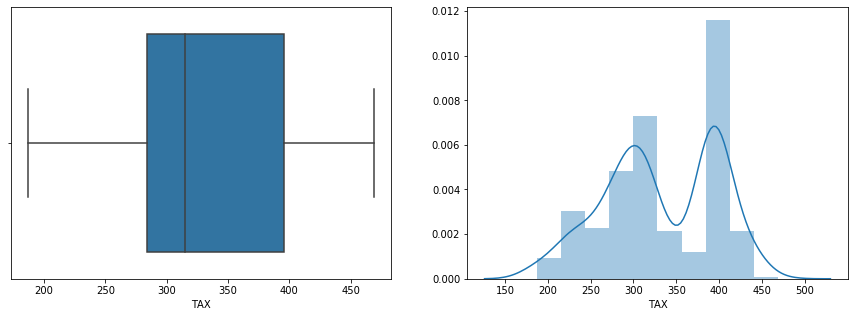

In [89]:
df_investigate["NOX"].describe()

# ranging from 0.38 to .87 
# lets make buckets ranging from .3 to .9 in .1 steps

df_investigate["NOXbucket"] = np.floor(df_investigate["NOX"] * 10 ) / 10

# we have the buckets now assign each bucket the mean TAX value
NOX_to_TAX_dict = df_investigate[["NOXbucket","TAX"]].groupby(["NOXbucket"]).mean()["TAX"].to_dict()

#bucket list lacks .7 so we articially create it by meaning .6 and .8
NOX_to_TAX_dict[.7] = (NOX_to_TAX_dict[.6] + NOX_to_TAX_dict[.8]) / 2

# apply buckets to original dataset for assignments
df["NOXbucket"] = np.floor(df["NOX"] * 10 ) / 10

# now assign the original dataset df the changed numbers
df["TAX"] = df.apply(lambda x: NOX_to_TAX_dict[x["NOXbucket"]] if x["TAX"] >= 600 else x["TAX"]  ,axis=1)

# drop the bucket column
df = df.drop(["NOXbucket"],axis=1)

plt.figure(figsize=(15,5))

ax = plt.subplot(121)
sns.boxplot(df["TAX"],ax=ax)

ax = plt.subplot(122)
sns.distplot(df["TAX"],ax=ax)


The result is still not perfect but better than before where we had to disconnected "Islands" in the distribution function

Before we further analyse features we will have a look at a heatmap of the correlation matrix to see what featueres are even worth discussing. We will pick features with a high correlation towards our target variable as candidates for our ML models

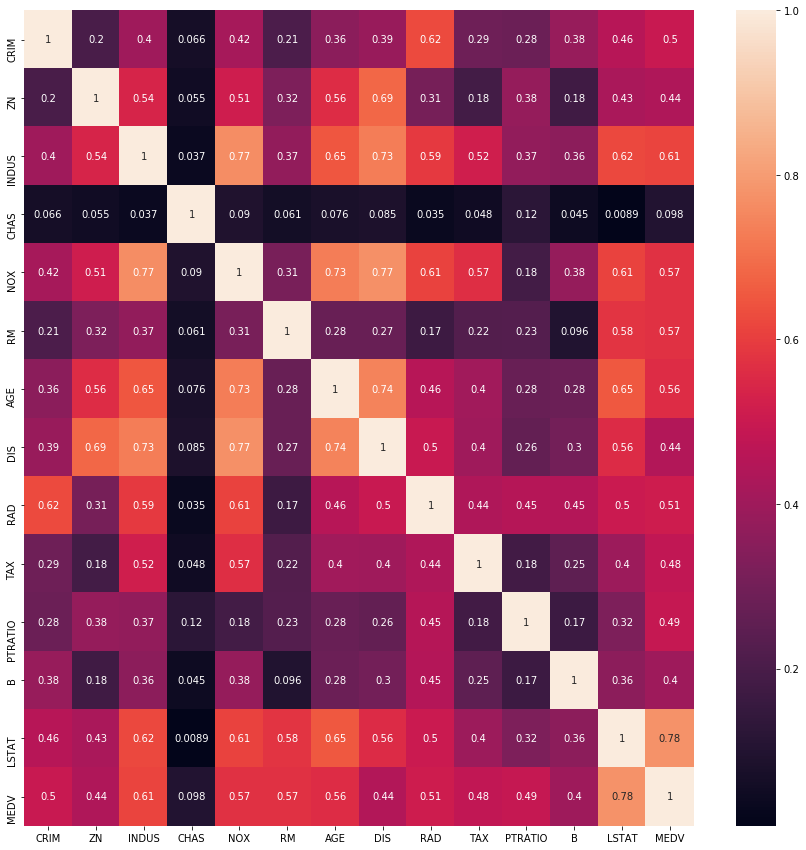

In [90]:
plt.figure(figsize=(15,15))

sns.heatmap(df.corr().abs(),annot=True)

LSTAT, RAD, AGE, RM, NOX, INDUS have a correlation > 0.5. We also include TAX because we did so much cleaning work at this point it is interesting for us to see if a model picks it up. Naturally it seems to be related because TAX are reflected by the House Price normally

In [106]:
df_cleaned = df[["LSTAT","TAX","RAD","AGE","RM","NOX","INDUS","MEDV"]]

Before we start with evaluating the models we will split into test and train set

Then for the evaluation of Machine Learning Models we do following steps for each ML model

* Pick model and run baseline scoring (mape) on a cross validation 5 fold
* Tune Hyper Parameters by doing GridSearch
* Run cross validation on tuned model and note scores
* Finally validate against test set and note scores

At the end we will compare the models on distribution of cross validation and also on the error score (we chose mae (mean absolute error)

Following models are going to be evaluated:

* Linear Regeression
* Random Forest
* Support Vector Machine
* Gradient Boost
* FNN (Dense neural network)

In [109]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_cleaned.iloc[:,:-1], df_cleaned.iloc[:,-1], test_size=0.2)

## Models

First of all we implement a Pipeline for each model because the scales of the different features are varying greatly. For this we will introduce StandardScaler. We also could think of min/max scaler but we go with StandardScaler for now.

Since we already established that we don't have missing values no Imputer will be used.

In [171]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from tensorflow import keras
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential

scoremap = {}
test_scores = {}

In [172]:
linear_pipe = Pipeline([
    ("dataprep", StandardScaler()),
    ("lr",LinearRegression())
])

# do baseline evaluation

scores = cross_val_score(linear_pipe,X_train,y_train, cv=5, n_jobs=4, verbose=5, scoring="neg_mean_absolute_error")
print(np.abs(scores), np.abs(np.mean(scores)))

# Baseline is ~ 3.07

# ignore hyper parameter because they don't really exist for LinearRegression

#takeover scores as final scores
scoremap["Linear Regression"] = np.abs(scores)

linear_pipe.fit(X_train,y_train)
predictions = linear_pipe.predict(X_test)

mae = mean_absolute_error(y_test,predictions)

print(mae)
test_scores["Linear Regression"] = mae


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   5 | elapsed:    2.8s remaining:    4.1s


[3.03152432 2.82214269 3.41476952 2.95611329 3.14489302] 3.0738885676880745
2.729631397695149


[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    3.2s finished


In [173]:
rf_pipe = Pipeline([
    ("dataprep", StandardScaler()),
    ("rf",RandomForestRegressor())
])

# do baseline evaluation

scores = cross_val_score(rf_pipe,X_train,y_train, cv=5, n_jobs=4, verbose=5, scoring="neg_mean_absolute_error")
print(np.abs(scores), np.abs(np.mean(scores)))

# Baseline is ~ 2.18

# do gridsearch
#parameters = {
#    "rf__n_estimators": [10,50,100,150],
#    "rf__max_depth": [8,16,32,64,128,None]
#}

#clf = GridSearchCV(rf_pipe, parameters,cv=5,scoring="neg_mean_absolute_error",verbose=1)
#clf.fit(X_train,y_train)
#print(clf.best_params_)
#{'rf__max_depth': None, 'rf__n_estimators': 50}

rf_pipe[1].max_depth=None
rf_pipe[1].n_estimators=50

#takeover scores as final scores
scoremap["Random Forest"] = np.abs(scores)

rf_pipe.fit(X_train,y_train)
predictions = rf_pipe.predict(X_test)

mae = mean_absolute_error(y_test,predictions)

print(mae)
test_scores["Random Forest"] = mae


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   5 | elapsed:    0.7s remaining:    1.0s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    1.1s finished


[2.18349333 2.06685333 2.38561333 1.98877333 2.19881081] 2.1647088288288288
1.9801702127659564


In [174]:
svm_pipe = Pipeline([
    ("dataprep", StandardScaler()),
    ("svm",SVR())
])

# do baseline evaluation

scores = cross_val_score(svm_pipe,X_train,y_train, cv=5, n_jobs=4, verbose=5, scoring="neg_mean_absolute_error")
print(np.abs(scores), np.abs(np.mean(scores)))

# Baseline is ~ 2.18

# do gridsearch
parameters = {
    "svm__C": [1e-2, 1e-1, 1e0, 1e1, 1e2],
    "svm__kernel": ["linear","rbf"]
}

clf = GridSearchCV(svm_pipe, parameters,cv=5,scoring="neg_mean_absolute_error",verbose=1)
clf.fit(X_train,y_train)
print(clf.best_params_)
#{'svm__C': 10.0, 'svm__kernel': 'rbf'}

svm_pipe[1].C=10
svm_pipe[1].kernel="rbf"

#takeover scores as final scores
scoremap["SVM"] = np.abs(scores)

svm_pipe.fit(X_train,y_train)
predictions = svm_pipe.predict(X_test)

mae = mean_absolute_error(y_test,predictions)

print(mae)
test_scores["SVM"] = mae


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[2.41608344 2.43036914 2.699404   2.05031337 2.76555951] 2.472345892251704
Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'svm__C': 10.0, 'svm__kernel': 'rbf'}
2.000340420298744


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    2.6s finished


In [176]:
gb_pipe = Pipeline([
    ("dataprep", StandardScaler()),
    ("xbg",GradientBoostingRegressor())
])

# do baseline evaluation

scores = cross_val_score(gb_pipe,X_train,y_train, cv=5, n_jobs=4, verbose=5, scoring="neg_mean_absolute_error")
print(np.abs(scores), np.abs(np.mean(scores)))

# Baseline is ~ 2.18

# do gridsearch
parameters = {
    #"xbg__min_samples_split": np.linspace(0.1, 0.5, 12),
    #"xbg__min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "xbg__max_depth":[3,5,8],
    #"xbg__max_features":["log2","sqrt"],
    #"xbg__criterion": ["friedman_mse",  "mae"],
    "xbg__subsample":[0.5, 0.8, 1.0],
    "xbg__n_estimators":[10,100,1000]
    }

clf = GridSearchCV(gb_pipe, parameters,cv=5,scoring="neg_mean_absolute_error",verbose=1)
#clf.fit(X_train,y_train)
#print(clf.best_params_)
#{'xbg__max_depth': 8, 'xbg__n_estimators': 1000, 'xbg__subsample': 0.5}

gb_pipe[1].max_depth=8
gb_pipe[1].n_estimators=1000
gb_pipe[1].subsample=0.5


#takeover scores as final scores
scoremap["Gradient Boost"] = np.abs(scores)

gb_pipe.fit(X_train,y_train)
predictions = gb_pipe.predict(X_test)

mae = mean_absolute_error(y_test,predictions)

print(mae)
test_scores["Gradient Boost"] = mae


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.3s finished


[2.15110911 2.34098387 2.2745426  1.9887839  2.37732403] 2.2265487029891777
1.7676934110233231


In [177]:
def fnn():
    model = Sequential()
    model.add(Dense(50, input_shape=(X_train.shape[1],),activation='relu'))
    model.add(Dropout(.2))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mae')
    return model

fnn_pipe = Pipeline([
    ("dataprep", StandardScaler()),
    ("nn",KerasRegressor(build_fn=fnn, epochs=100, batch_size=1, verbose=False))
])

# do baseline evaluation

#fnn_pipe.fit(X_train,y_train)

scores = cross_val_score(fnn_pipe,X_train,y_train, cv=5, n_jobs=-1, verbose=5, scoring="neg_mean_absolute_error")
print(np.abs(scores), np.abs(np.mean(scores)))

# Baseline is ~ 2.18


#takeover scores as final scores
scoremap["NN"] = np.abs(scores)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from keras.callbacks import ReduceLROnPlateau, EarlyStopping

lrcallback = ReduceLROnPlateau(factor=0.1, patience=0, monitor='loss',verbose=True)
es = EarlyStopping(monitor='loss', patience=2, verbose=True, mode="min", restore_best_weights=True)


model = fnn()
history = model.fit(X_train_scaled, y_train, epochs=15, batch_size=1, verbose=True, callbacks= [es])

predictions = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test,predictions)

print(mae)
test_scores["NN"] = mae



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.4min remaining:  2.1min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.4min finished


[2.49011242 2.72966845 2.71133893 2.01309052 2.39210814] 2.4672636932098113
Epoch 1/15
374/374 [==============================] - 1s 3ms/step - loss: 12.8000
Epoch 2/15
374/374 [==============================] - 1s 3ms/step - loss: 4.3196
Epoch 3/15
374/374 [==============================] - 1s 3ms/step - loss: 3.7399
Epoch 4/15
374/374 [==============================] - 1s 3ms/step - loss: 3.4518
Epoch 5/15
374/374 [==============================] - 1s 3ms/step - loss: 3.3153
Epoch 6/15
374/374 [==============================] - 1s 3ms/step - loss: 3.1108
Epoch 7/15
374/374 [==============================] - 1s 3ms/step - loss: 3.1323
Epoch 8/15
374/374 [==============================] - 1s 3ms/step - loss: 2.8389
Epoch 9/15
374/374 [==============================] - 1s 2ms/step - loss: 2.9800
Epoch 10/15
374/374 [==============================] - 1s 3ms/step - loss: 2.8678
Restoring model weights from the end of the best epoch
Epoch 00010: early stopping
2.5034846630502248


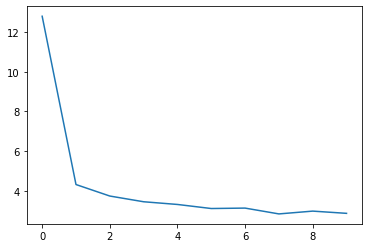

In [178]:
plt.plot(history.history["loss"])

In [168]:
# evaluate all

{'Linear Regression': 2.729631397695149, 'Random Forest': 1.9801702127659564, 'SVM': 2.000340420298744, 'Gradient Boost': 1.7676934110233231, 'NN': 2.5034846630502248}


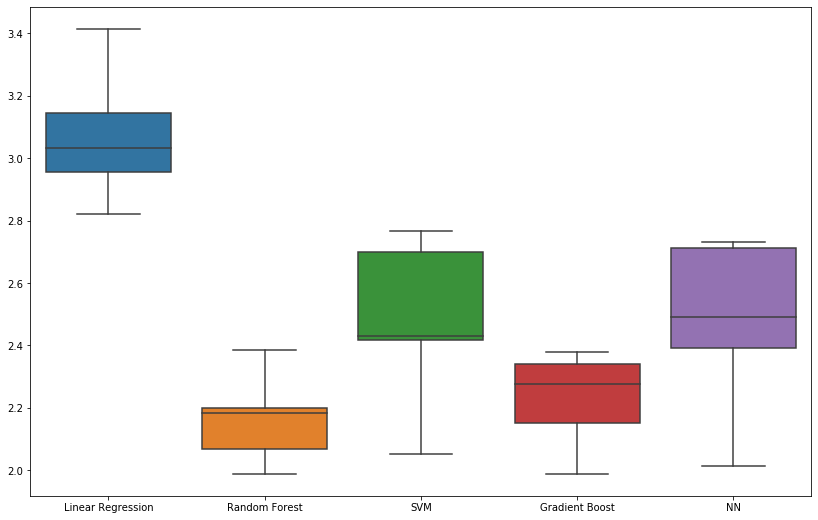

In [189]:
df_eval = pd.DataFrame.from_dict(scoremap)
plt.figure(figsize=(14,9))
sns.boxplot(data=df_eval)
#pd.DataFrame.from_dict(test_scores).plot()
print(test_scores)

Observations:

* As expected Linear Regression performed the worst
* Feed Forward Neural Network performed almost like SVM both are sharing 2nd place
* Random Forest and Gradient Boost almost perfomed alike but Random Forest is a bit more consistent
* Although on Test set Gradient Boost is a bit better than Random Forest, we would chose now Random Forest for forecasting due to its consistency.
